# Funciones de distribución de probabilidad

In [33]:
import pandas as pd
import numpy as np  #Paquete para generar distribuciones
import matplotlib.pyplot as plt   #Paquete para graficar

### Dustribucion uniforme (continua) - numpy.random.uniform()

In [16]:
a=1
b=100
n= 1000000
#Generacion de n datos uniformes con valores entre a y b
individuos_uniforme = np.random.uniform(a,b,n)  #elige n numeros aleatorios entre a y b

(array([ 99505., 100096., 100173., 100575., 100694.,  99606.,  99776.,
        100003.,  99861.,  99711.]),
 array([ 1.00002573, 10.90001433, 20.80000293, 30.69999153, 40.59998012,
        50.49996872, 60.39995732, 70.29994591, 80.19993451, 90.09992311,
        99.9999117 ]),
 <a list of 10 Patch objects>)

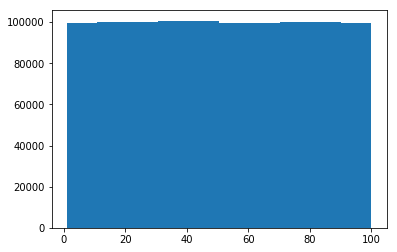

In [17]:
#Histograma de los datos generados
plt.hist(individuos_uniforme)

### Distribucion normal - numpy.random.randn()

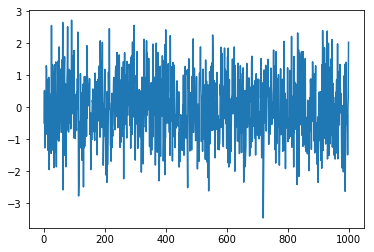

In [22]:
#Generacion de valores normales (predeterminado=estandar)
individuos_normal = np.random.randn(1000)
x = range(1,1001)
plt.plot(x,individuos_normal)

(array([  1.,  13.,  46., 118., 206., 228., 190., 127.,  54.,  17.]),
 array([-3.45806923, -2.84046396, -2.22285868, -1.60525341, -0.98764813,
        -0.37004286,  0.24756241,  0.86516769,  1.48277296,  2.10037824,
         2.71798351]),
 <a list of 10 Patch objects>)

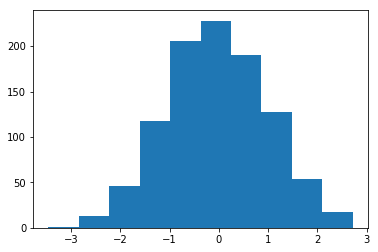

In [23]:
#Histograma de los valores
plt.hist(individuos_normal)

In [24]:
#Otra generacion de valores normales
individuos_normal2 = np.random.randn(1000000)
x = range(1,1000001)

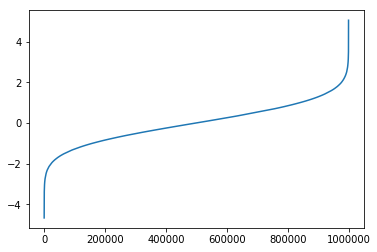

In [29]:
#visualizamos los valores ordenados
plt.plot(x,sorted(individuos_normal2))

In [30]:
#Distribucion Normal NO estándar (haciendo la estandarizacion de la variable no estandar)
m = 5.5
sd = 2.5
individuos_z = np.random.randn(1000000)  
individuos_x = (individuos_z*sd)+m       # Z = (X-m)/sd  -> X = Z*sd +m

(array([2.00000e+00, 1.20000e+01, 8.30000e+01, 4.41000e+02, 2.12700e+03,
        7.79300e+03, 2.34520e+04, 5.54630e+04, 1.05058e+05, 1.58165e+05,
        1.89774e+05, 1.80751e+05, 1.36147e+05, 8.14480e+04, 3.87430e+04,
        1.47910e+04, 4.45200e+03, 1.06400e+03, 2.06000e+02, 2.80000e+01]),
 array([-7.55531437, -6.3439801 , -5.13264582, -3.92131154, -2.70997726,
        -1.49864298, -0.2873087 ,  0.92402557,  2.13535985,  3.34669413,
         4.55802841,  5.76936269,  6.98069697,  8.19203125,  9.40336552,
        10.6146998 , 11.82603408, 13.03736836, 14.24870264, 15.46003692,
        16.67137119]),
 <a list of 20 Patch objects>)

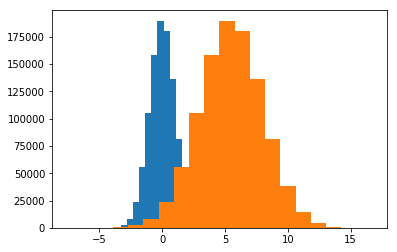

In [36]:
%matplotlib inline
plt.hist(individuos_z, bins = 20)
plt.hist(individuos_x,bins=20)

In [39]:
# Generar varias muestras normales estandar del mismo tamaño
individuos_normales = np.random.randn(2,5)  #Generar dos muestras de tamaño 5 cada una
individuos_normales

array([[ 0.80014157,  0.24946114,  0.21704916, -0.24752546, -0.8157599 ],
       [ 0.6936957 , -1.25609549, -0.52669086, -0.76006018, -2.67260723]])

## Ejemplo 1: Metodo Montecarlo para aproximar pi

In [31]:
def pi_montecarlo(tamaño_muestra, simulaciones):

    arreglo_pi=[]
    for j in range(simulaciones):

        x = np.random.uniform(0,1,tamaño_muestra)    #A partir de aquí se hace la simulacion de pi
        y = np.random.uniform(0,1,tamaño_muestra)
        adentro=0
        for i in range(tamaño_muestra):
            if np.sqrt(x[i]**2 + y[i]**2)<=1:
                adentro+=1       
        proba = float(adentro) / tamaño_muestra
        pi = 4*proba                                # aquí acaba la simulacion de pi. (se obtuvo un valor)
        arreglo_pi.append(pi)                      
    promedio = sum(arreglo_pi)/simulaciones
    fig = plt.plot(arreglo_pi)
    return  (promedio,fig)  # Otorgamos un valor final a la aproximacion de pi (promedio de todos los pi's)


(3.1415200000000003, [<matplotlib.lines.Line2D at 0x1c824434588>])

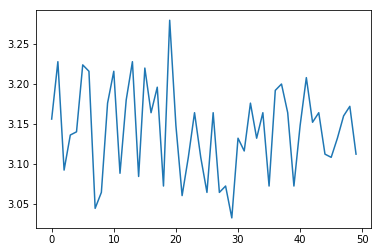

In [32]:
#50 simulaciones de pi, con tamaño de muestra 1000 cada una
#Devuelve el promedio de todas las simulaciones y una gráfica
pi_montecarlo(1000,50)

## Ejemplo 2: Crear Dummy DataFrame

In [47]:
tabla = pd.read_csv("../Datasets/customer-churn-model/Customer Churn Model.txt")
nombres = tabla.columns.values.tolist()
lon = len(nombres)

In [52]:
datos =pd.DataFrame( {                  # Se crea un dataframe a partir de un diccionario.
    "Individuo":nombres,                # Columna con los nombres de los individuos(categorica)
    "A": np.random.uniform(0,50,lon),   # Columna con valores uniformes del 0 al 50 (numerica continua)
    "B": np.random.randn(lon),          # Columna con valores normales estandar
    "C": 5 + 2*np.random.randn(lon)     # Columna con valores normales de media 5 y desviacion estandar 2.5
})

In [53]:
datos.head()

,Individuo,A,B,C
0,State,47.871889,0.241584,2.626910
1,Account Length,35.480548,1.864086,6.313854
2,Area Code,18.067085,1.583097,3.053006
3,Phone,21.609890,-1.738748,6.178542
4,Int'l Plan,12.590065,-0.171715,5.303809
